In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy.sparse as sparse

In [2]:
path = 'ca-GrQc.txt'
#Initializing empty graph
G = nx.Graph()           

In [3]:
nodes = []
edgelist = []

#adds all present nodes in list nodes and all edges in edge_list
with open(path) as f:
    for line in f:
        if line[0] != '#':
            line = line.strip()
            FromNodeId, ToNodeId = line.split('\t')
            edge = (FromNodeId,ToNodeId)
            edgelist.append(edge)
            if FromNodeId not in nodes:
                nodes.append(FromNodeId)
            if ToNodeId not in nodes:
                nodes.append(ToNodeId)
                
#add edges from list edges and nodes from list nodes
G.add_nodes_from(nodes)
G.add_edges_from(edgelist)


### (a) [3 p] (Basic properties of the network). (1) Compute the following statistics: number of nodes, number of edges.

### (2) If the graph is not connected: (i) find the number of connected components (CCs); (ii) plot the distribution of their sizes (similar to MSN’s connectivity shown in Lecture 1B, slide number 81).

### (3) Extract the largest (i.e., giant) connected component (GCC), and then (i) find the number of nodes and edges of GCC and (ii) the fraction of nodes and edges of the whole graph that belong to GCC (e.g., 5% of the number of nodes are part of GCC). Discuss briefly your observation (2-3 lines).

In [4]:
print("(a).(1)")
print("The number of of nodes in the graph is", G.number_of_nodes())
print("The number of edges in the graph is", G.number_of_edges(),"if we consider the graph to be undirected.")

(a).(1)
The number of of nodes in the graph is 5242
The number of edges in the graph is 14496 if we consider the graph to be undirected.


In [5]:
#stores list of connected components
CCs = sorted(nx.connected_components(G),key = len, reverse=True)
CClength = []
dict_length = {}
for CC in CCs:
    CClength.append(len(CC))
#Key: Size of connected component, Value: number of times this size occurs
for length in CClength:
    dict_length[length] = CClength.count(length)
    

(a). (2). (i)
The number of connected components is 355

(a). (2). (ii)


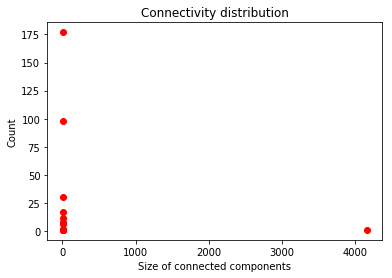

In [6]:
#shows distribution of connected components
print("(a). (2). (i)")
print("The number of connected components is", nx.number_connected_components(G))
print("")
print(("(a). (2). (ii)")) 
plt.plot(dict_length.keys(),dict_length.values(), 'ro')
plt.title("Connectivity distribution")
plt.xlabel("Size of connected components")
plt.ylabel("Count")
plt.show()

In [17]:
GCC = max(nx.connected_component_subgraphs(G),key=len)
print("(a). (3) (i)")
print("The connected component with the largest size has",GCC.number_of_nodes(),"nodes.")
print("It has",GCC.number_of_edges(),"edges.")
print("")

print("(a). (3) (ii)")
print("It contains", (GCC.number_of_nodes())/(G.number_of_nodes())*100,"% of all nodes.")
print("It contains", (GCC.number_of_edges())/(G.number_of_edges())*100,"% of all edges.")
print("")

print("Observation:")
print("From the observation of the largest connected component, we can deduce that most of the academic collaboration occurs in one particular academic sub_network. One particular connected component has the most actors and the and the most connections, which means that a significant majority of activity occurs in it. This seems to follow a power law distribution.")

(a). (3) (i)
The connected component with the largest size has 4158 nodes.
It has 13428 edges.

(a). (3) (ii)
It contains 79.32086989698588 % of all nodes.
It contains 92.63245033112582 % of all edges.

Observation:
From the observation of the largest connected component, we can deduce that most of the academic collaboration occurs in one particular academic sub_network. One particular connected component has the most actors and the and the most connections, which means that a significant majority of activity occurs in it. This seems to follow a power law distribution.


### (b) [5 p] (Analysis of the degree distribution). (1) Find the minimum, maximum, median and mean degree of the nodes of the graph. What do you observe (please, discuss briefly in 1-2 lines)? 

### (2) Visualize (appropriately) the degree distribution of the graph. What is the type of the degree distribution and what are the parameters? (You can use freely available software that was discussed in class).

In [8]:
degree_sequence  = sorted(list(dict(G.degree(nodes)).values()),reverse=True)
print("(b). (1)")
print("The minimum degree of the nodes is",min(degree_sequence))
print("The maximum degree of the nodes is",max(degree_sequence))
print("The mean degree of the nodes is", np.mean(degree_sequence))
print("The median degree of the nodes is", np.median(degree_sequence))
print("")
print("Observation:")
print("Based on the maximum value vs the mean and the median, we can deduce that the distribution seems heavily skewed on one tail.")

(b). (1)
The minimum degree of the nodes is 1
The maximum degree of the nodes is 81
The mean degree of the nodes is 5.530713468141931
The median degree of the nodes is 3.0

Observation:
Based on the maximum value vs the mean and the median, we can deduce that the distribution seems heavily skewed on one tail.



(b). (2)


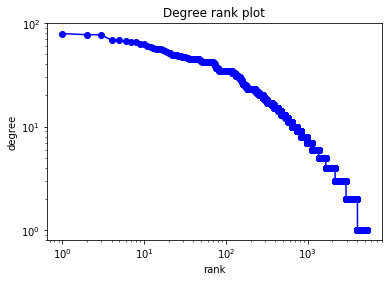

Based on the graph, it seems that the degree distribution follows a power-law degree distribution.
The average clustering coefficient of the graph is 0.529635811052136

Parameters of the distribution:
Fitted power-law distribution on discrete data

Exponent (alpha)  = 2.112615
Cutoff (xmin)     = 3.000000

Log-likelihood    = -8019.892429

H0: data was drawn from the fitted distribution

KS test statistic = 0.043350
p-value           = 0.000033

H0 rejected at significance level 0.05


In [22]:
print("(b). (2)")
plt.loglog(degree_sequence,'b-',marker = 'o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
# # draw graph in inset
# plt.axes([0.45,0.45,0.45,0.45])
# pos=nx.spring_layout(G)
# plt.axis('off')
# nx.draw_networkx_nodes(G,pos,node_size=20)
# nx.draw_networkx_edges(G,pos,alpha=0.4)

#plt.savefig("degree_histogram.png")
plt.show()
print("Based on the graph, it seems that the degree distribution follows a power-law degree distribution.")
print("The average clustering coefficient of the graph is",nx.average_clustering(G))
print("")

import igraph as ig
fit = ig.power_law_fit(degree_sequence)
print("Parameters of the distribution:")
print(fit)

(c). (1)
The number of triangles in the GCC is 47779.0

(c). (2)


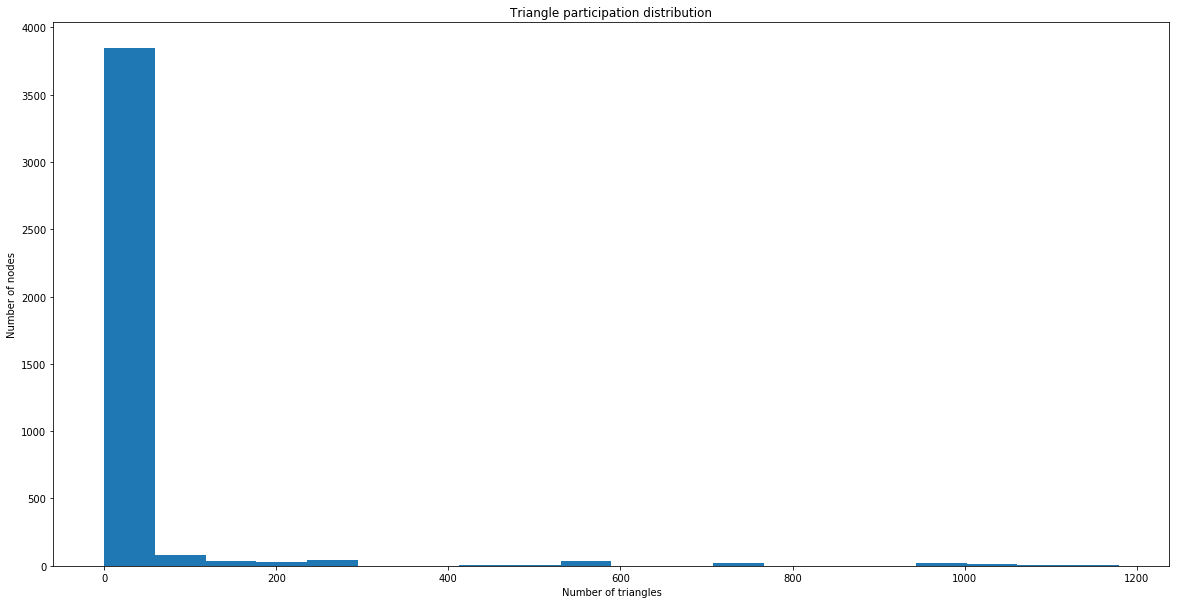

Observation:
The distribution shows a pattern that is heavily skewed to the left. This means that many nodes tend to participate in very few triangles.
We can infer that the distribution of triangles follows a power-law distribution


In [18]:
print("(c). (1)")

#stores the number of triangles. We divide by 3 because networkx counts each triangle 3 times
triangle_num = sum(nx.triangles(GCC).values())/3
print("The number of triangles in the GCC is",triangle_num)
print("")

print("(c). (2)")
triangle_sequences = list(nx.triangles(GCC).values())
plt.figure(figsize=(20,10))
plt.hist(triangle_sequences,bins=20)
plt.title("Triangle participation distribution")
plt.ylabel("Number of nodes")
plt.xlabel("Number of triangles")
plt.show()

print("Observation:")
print("The distribution shows a pattern that is heavily skewed to the left. This means that many nodes tend to participate in very few triangles.")
print("We can infer that the distribution of triangles follows a power-law distribution")

### (d) [7 p] (Spectral counting of triangles). In Question 3, you have been asked to express the total number of triangles ∆(G) using information about the eigenvalues of the adjacency matrix of the graph. Here, you should compute the number of triangles in the GCC of the graph using the eigenvalues of the corresponding adjacency matrix (again, consider that your graph G is the GCC). In order to compute exactly ∆(G), we need to compute the whole spectrum of the adjacency matrix, which can be a computational bottleneck (why?). Here, we argue that we can approximate ∆(G) using the top-k (k ≪ |V |) largest eigenvalues of the adjacency matrix, i.e., ∆(G) ≈ ∆ ̃ k (G), where ∆ ̃ k (G) is the spectral computation of the number of triangles, using only the top-k eigenvalues of the adjacency matrix. 

### (1) Why is this happening? Explain your answer, giving specific arguments. [Hint: we can do low rank approximation of the adjacency matrix for the computation of triangles, taking advantage of some of the “power-law” properties of real networks that we have seen in class]. 

### (2) Suppose that we approximate ∆(G) with ∆ ̃k(G). Compute and visualize the error of approximation for various values of k (i.e., how the error behaves as we increase the number of eigenvalues used in the computation of ∆ ̃ k (G)) How many eigenvalues should we retain to achieve good approximation? In the extreme case where all the |V | eigenvalues are used, ∆(G) = ∆ ̃ k=|V |(G).

(d). (1) The problem is a computational bottleneck because we are dealing with a matrix of large size where the complexity of eigenvalue decomposition is O(n^3). Since we are dealing with a matrix of size 4158*4158, the worst case scenario of computing all eigenvalues of this matrix is approximately 72 billions of calculations. Therefore, in order to reduce the computational complexity of spectral triangle calculations, we can use low rank approximation with much fewer eigenvalues in order to obtain a smaller, yet accurate representation of the adjacency matrix.

In [11]:
#extracts adjacency matrix of GCC
adj_matrix = nx.adjacency_matrix(GCC)

#converts sparse matrix as f type. Otherwise, I cannot compute the eigenvectors and eigenvalues
adj_matrix = adj_matrix.asfptype()

#computes eigenvectors and eigenvectors
#Here I have to use the scipy.sparse library because numpy cannot perfom operations on sparse matrices
eigenvals, eigenvecs = sparse.linalg.eigs(adj_matrix, k=100) #k is the number of eigenvals and eigenveccs I want

In [12]:
#function to directly compute the error of approximation of number of triangles
def error(matrix, k = 100):
    eigenvals, eigenvecs = sparse.linalg.eigs(matrix, k)
    
    #number obtained through previous question
    real_triangle_num = 47779
    
    val_cub = 0
    sum_of_val=0
    
    for val in eigenvals:
        val_cub = val**3
        sum_of_val += val_cub
    
    approx_triangle = sum_of_val/6
    
    error_k = abs(approx_triangle-real_triangle_num)/real_triangle_num
    
    return error_k

In [13]:
#list that will contain the values of all errors
error_list = []
for k in range(1,200):
    error_list.append(error(adj_matrix,k))

(d). (2)


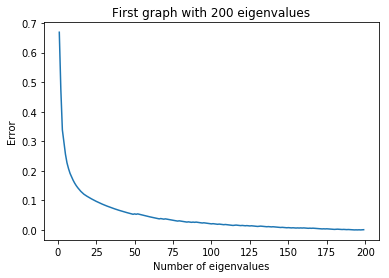

We will plot a second graph with fewer values in order to better see how many eigenvalues we should pick


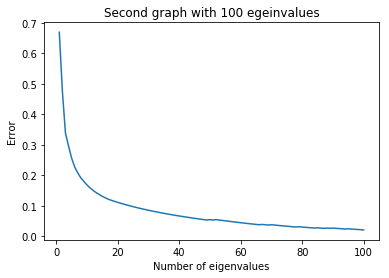

Third graph with even fewer values


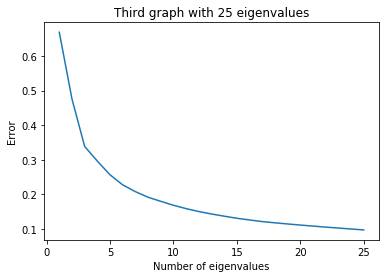

Based on these graphs, the error seems to converge to 0.1 starting at 20 eigenvalues. Thus, we can pick 20
eigenvalues, which is fairly good computation-wise


In [16]:
print("(d). (2)")
k_range = []
#first plot
for i in range(1,200):
    k_range.append(i)
plt.plot(k_range,error_list)
plt.xlabel("Number of eigenvalues")
plt.ylabel("Error")
plt.title("First graph with 200 eigenvalues")
plt.show()

print("We will plot a second graph with fewer values in order to better see how many eigenvalues we should pick")
plt.plot(k_range[0:100],error_list[0:100])
plt.xlabel("Number of eigenvalues")
plt.ylabel("Error")
plt.title("Second graph with 100 egeinvalues")
plt.show()

print("Third graph with even fewer values")
plt.plot(k_range[0:25],error_list[0:25])
plt.xlabel("Number of eigenvalues")
plt.ylabel("Error")
plt.title("Third graph with 25 eigenvalues")
plt.show()

print("Based on these graphs, the error seems to converge to 0.1 starting at 20 eigenvalues. Thus, we can pick 20 eigenvalues, which is fairly good computation-wise")
